#UTS Project Sistem Temu Kembali Informasi (STKI)
Raditya Abdul Afeef

A11.2022.14203

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###SOAL 02 - Document Preprocessing

In [ ]:
#Instal sastrawi dan nltk
!pip install sastrawi

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Memuat dokumen dari Drive
import os

data_path = '/content/drive/MyDrive/UTS-STKI-A112214203/data/'

documents = {}

for filename in os.listdir(data_path):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_path, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            documents[filename] = file.read()

#Verifikasi dokumen
if documents:
    print(f"Berhasil memuat {len(documents)} dokumen.")
    sample_doc_name = list(documents.keys())[0]
    print(f"\nContoh isi dari '{sample_doc_name}':")
    print(documents[sample_doc_name][:200] + "...")
else:
    print("Gagal memuat dokumen. Periksa kembali path folder 'data' Anda.")

Berhasil memuat 10 dokumen.

Contoh isi dari 'orangutan.txt':
Orang utan (bentuk tidak baku: orangutan) atau mawas adalah kera besar yang berasal dari hutan hujan Indonesia dan Malaysia. Sekarang hewan ini hanya ditemukan di sebagian Kalimantan dan Sumatra, teta...


In [ ]:
#Import libraries
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
#Inisialisasi Stemmer dan daftar Stopwords
factory = StemmerFactory()
stemmer = factory.create_stemmer()

list_stopwords = stopwords.words('indonesian')

# list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", "k", "o", "ke"])

In [ ]:
#Define functions

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https{1,2}:\/\/\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

In [ ]:
#Pipeline preprocessing
def preprocess_pipeline(text):
    text = clean_text(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stem_tokens(tokens)
    return tokens

In [ ]:
#Testing pipeline sebelum dan sesudah
sample_doc_name = 'harimau_sumatra.txt'
sample_text = documents[sample_doc_name]

processed_tokens = preprocess_pipeline(sample_text)

print("--- SEBELUM PREPROCESSING ---")
print(sample_text)
print("\n" + "="*50 + "\n")
print("--- SETELAH PREPROCESSING ---")
print(processed_tokens)

--- SEBELUM PREPROCESSING ---
Harimau sumatra adalah populasi Panthera tigris sondaica yang mendiami pulau Sumatra, Indonesia dan satu-satunya anggota subspesies harimau sunda yang masih bertahan hidup hingga saat ini. Ia termasuk dalam klasifikasi satwa kritis yang terancam punah (critically endangered) dalam daftar merah spesies terancam yang dirilis Lembaga Konservasi Dunia IUCN. Populasi liar diperkirakan antara 400-500 ekor, terutama hidup di Pegunungan Bukit Barisan jama sejarah taman-taman nasional di Sumatra jaman pra-sejarah. Uji genetik mutakhir telah mengungkapkan tanda-tanda genetik yang unik, yang menandakan bahwa subspesies ini mungkin berkembang menjadi spesies terpisah, bila berhasil lestari.

Penghancuran habitat merupakan ancaman terbesar terhadap populasi saat ini. Pembalakan tetap berlangsung bahkan di taman nasional yang seharusnya dilindungi. Tercatat 66 ekor harimau sumatra terbunuh antara tahun 1998 dan 2000.


--- SETELAH PREPROCESSING ---
['harimau', 'sumatra'

In [ ]:
#Menerapkan ke semua dokumen
import time

start_time = time.time()

processed_docs = {}
for doc_name, content in documents.items():
    processed_docs[doc_name] = preprocess_pipeline(content)

end_time = time.time()

print(f"Selesai memproses {len(processed_docs)} dokumen dalam {end_time - start_time:.2f} detik.")
print("\nContoh hasil untuk 'orangutan.txt':")
print(processed_docs['orangutan.txt'])

Selesai memproses 10 dokumen dalam 28.30 detik.

Contoh hasil untuk 'orangutan.txt':
['orang', 'utan', 'bentuk', 'baku', 'orangutan', 'mawas', 'kera', 'asal', 'hutan', 'hujan', 'indonesia', 'malaysia', 'hewan', 'temu', 'kalimantan', 'sumatra', 'era', 'pleistosen', 'sebar', 'asia', 'tenggara', 'tiongkok', 'selatan', 'orang', 'utan', 'klasifikasi', 'genus', 'pongo', 'anggap', 'spesies', 'orang', 'utan', 'bagi', 'spesies', 'orang', 'utan', 'kalimantan', 'p', 'pygmaeus', 'subspesies', 'orang', 'utan', 'sumatra', 'p', 'abelii', 'spesies', 'tiga', 'orang', 'utan', 'tapanuli', 'p', 'tapanuliensis', 'identifikasi', 'definitif', 'orang', 'utan', 'satusatunya', 'genus', 'hidup', 'subfamili', 'ponginae', 'genetik', 'pisah', 'hominidae', 'gorila', 'simpanse', 'manusia', 'juta', 'orang', 'utan', 'kera', 'arboreal', 'habis', 'pohon', 'orang', 'utan', 'milik', 'kaki', 'relatif', 'pendek', 'banding', 'lengan', 'relatif', 'milik', 'rambut', 'cokelat', 'merah', 'tutup', 'tubuh', 'orang', 'utan', 'jantan

In [ ]:
#Menampilkan 10 token paling sering untuk dokumen sampel
from collections import Counter

sample_keys = list(processed_docs.keys())[:2]

for doc_name in sample_keys:
    print(f"\n--- 10 Token Teratas di '{doc_name}' ---")
    token_counts = Counter(processed_docs[doc_name])
    for token, count in token_counts.most_common(10):
        print(f"{token}: {count}")


--- 10 Token Teratas di 'orangutan.txt' ---
orang: 14
utan: 14
milik: 4
kera: 3
spesies: 3
p: 3
jantan: 3
dewasa: 3
betina: 3
bentuk: 2

--- 10 Token Teratas di 'harimau_sumatra.txt' ---
sumatra: 4
harimau: 3
populasi: 3
ancam: 3
subspesies: 2
hidup: 2
spesies: 2
ekor: 2
nasional: 2
genetik: 2


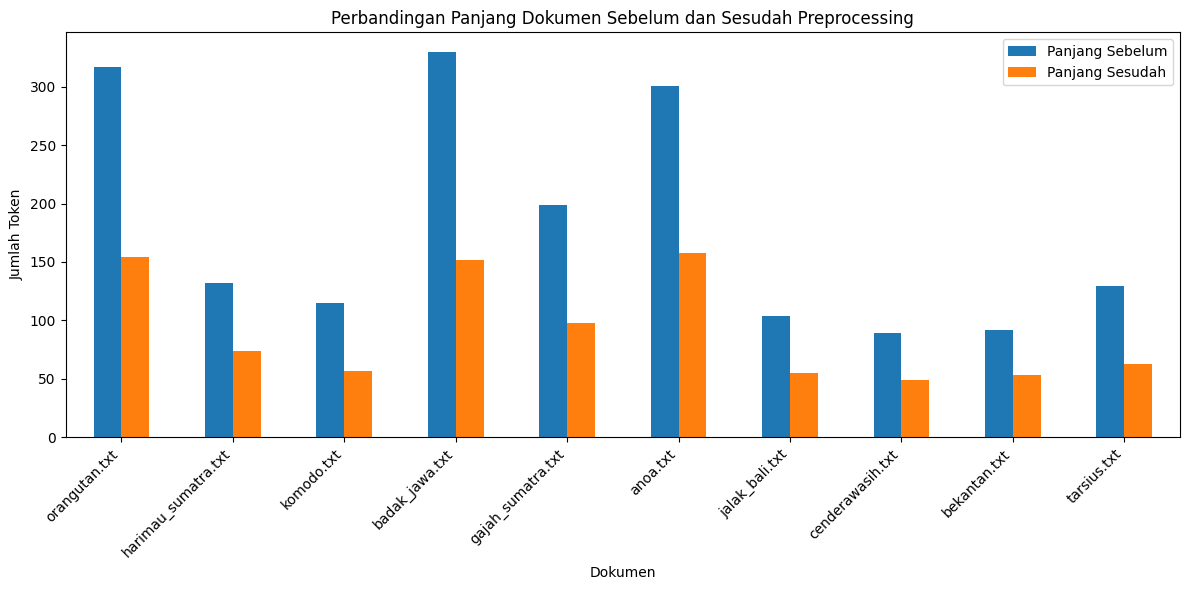

In [ ]:
#Analisis dan visualisasi panjang dokumen
import pandas as pd
import matplotlib.pyplot as plt

doc_lengths_before = [len(word_tokenize(doc)) for doc in documents.values()]
doc_lengths_after = [len(tokens) for tokens in processed_docs.values()]
doc_names = list(documents.keys())

df_lengths = pd.DataFrame({
    'Dokumen': doc_names,
    'Panjang Sebelum': doc_lengths_before,
    'Panjang Sesudah': doc_lengths_after
})

df_lengths.plot(kind='bar', x='Dokumen', figsize=(12, 6))
plt.title('Perbandingan Panjang Dokumen Sebelum dan Sesudah Preprocessing')
plt.ylabel('Jumlah Token')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###SOAL 03 - Boolean Retrieval Model

In [ ]:
#Membangun Vocabulary
all_tokens = [token for doc_tokens in processed_docs.values() for token in doc_tokens]

vocabulary = sorted(list(set(all_tokens)))

print(f"Berhasil membuat vocabulary dengan {len(vocabulary)} kata unik.")
print("Contoh 10 kata pertama dari vocabulary:")
print(vocabulary[:10])

Berhasil membuat vocabulary dengan 425 kata unik.
Contoh 10 kata pertama dari vocabulary:
['abad', 'abelii', 'afrika', 'agresif', 'air', 'akibat', 'aku', 'alam', 'alih', 'ambah']


In [ ]:
#Membuat Inverted Index
inverted_index = {}

for term in vocabulary:
    doc_list = []
    for doc_name, tokens in processed_docs.items():
        if term in tokens:
            doc_list.append(doc_name)
    inverted_index[term] = doc_list

print("Contoh Inverted Index:")
print(f"anoa -> {inverted_index.get('anoa')}")
print(f"sumatra -> {inverted_index.get('sumatra')}")
print(f"tanduk -> {inverted_index.get('tanduk')}")
print(f"cula -> {inverted_index.get('cula')}")

Contoh Inverted Index:
anoa -> ['anoa.txt']
sumatra -> ['orangutan.txt', 'harimau_sumatra.txt', 'badak_jawa.txt', 'gajah_sumatra.txt']
tanduk -> ['anoa.txt']
cula -> ['badak_jawa.txt']


In [ ]:
#Fungsi pencarian Boolean
def boolean_search(query, index, all_docs):

    all_doc_names = set(all_docs.keys())
    query = query.lower().strip()

    if query.startswith('not '):
        term = query.split(' ', 1)[1]
        term = stemmer.stem(term)

        docs_with_term = set(index.get(term, []))
        return sorted(list(all_doc_names - docs_with_term))

    elif ' and ' in query:
        parts = query.split(' and ')
        term1 = stemmer.stem(parts[0])
        term2 = stemmer.stem(parts[1])

        docs1 = set(index.get(term1, []))
        docs2 = set(index.get(term2, []))
        return sorted(list(docs1 & docs2))

    elif ' or ' in query:
        parts = query.split(' or ')
        term1 = stemmer.stem(parts[0])
        term2 = stemmer.stem(parts[1])

        docs1 = set(index.get(term1, []))
        docs2 = set(index.get(term2, []))
        return sorted(list(docs1 | docs2))

    else:
        term = stemmer.stem(query)
        return sorted(index.get(term, []))

In [ ]:
#Testing fungsi boolean_search

#Mencari dokumen yang mengandung kata 'harimau' DAN 'sumatra'
query1 = "harimau AND sumatra"
result1 = boolean_search(query1, inverted_index, documents)
print(f"Hasil pencarian untuk '{query1}':")
print(result1)
print("Penjelasan: Dokumen-dokumen ini mengandung kata 'harimau' DAN 'sumatra' setelah di-stem.\n")

#Mencari dokumen yang mengandung kata 'badak' ATAU 'gajah'
query2 = "badak OR gajah"
result2 = boolean_search(query2, inverted_index, documents)
print(f"Hasil pencarian untuk '{query2}':")
print(result2)
print("Penjelasan: Dokumen-dokumen ini mengandung salah satu kata, 'badak' ATAU 'gajah'.\n")

#Mencari dokumen yang TIDAK mengandung kata 'kalimantan'
query3 = "NOT kalimantan"
result3 = boolean_search(query3, inverted_index, documents)
print(f"Hasil pencarian untuk '{query3}':")
print(result3)
print(f"Penjelasan: Ditemukan {len(result3)} dokumen yang TIDAK mengandung kata 'kalimantan'.\n")

#Mencari dokumen yang mengandung kata 'endemik'
query4 = "endemik"
result4 = boolean_search(query4, inverted_index, documents)
print(f"Hasil pencarian untuk '{query4}':")
print(result4)
print("Penjelasan: Dokumen-dokumen ini mengandung kata 'endemik'.")

Hasil pencarian untuk 'harimau AND sumatra':
['harimau_sumatra.txt']
Penjelasan: Dokumen-dokumen ini mengandung kata 'harimau' DAN 'sumatra' setelah di-stem.

Hasil pencarian untuk 'badak OR gajah':
['badak_jawa.txt', 'gajah_sumatra.txt']
Penjelasan: Dokumen-dokumen ini mengandung salah satu kata, 'badak' ATAU 'gajah'.

Hasil pencarian untuk 'NOT kalimantan':
['anoa.txt', 'badak_jawa.txt', 'cenderawasih.txt', 'gajah_sumatra.txt', 'harimau_sumatra.txt', 'jalak_bali.txt', 'komodo.txt', 'tarsius.txt']
Penjelasan: Ditemukan 8 dokumen yang TIDAK mengandung kata 'kalimantan'.

Hasil pencarian untuk 'endemik':
['anoa.txt', 'bekantan.txt', 'jalak_bali.txt']
Penjelasan: Dokumen-dokumen ini mengandung kata 'endemik'.


In [ ]:
#Uji Wajib: Menghitung Precision dan Recall

#Truth Set
truth_set = {
    "pulau AND sulawesi": ['anoa.txt'],
    "kera OR monyet": ['bekantan.txt', 'orangutan.txt'],
    "punah AND kritis": ['harimau_sumatra.txt']
}

print("--- UJI WAJIB BOOLEAN RETRIEVAL ---")

for query, gold_standard_docs in truth_set.items():

    system_results = boolean_search(query, inverted_index, documents)

    gold_set = set(gold_standard_docs)
    system_set = set(system_results)

    #Hitung True Positives, False Positives, False Negatives
    true_positives = len(gold_set.intersection(system_set))
    false_positives = len(system_set - gold_set)
    false_negatives = len(gold_set - system_set)

    #Hitung Precision dan Recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    print(f"\nQuery: '{query}'")
    print(f" -> Gold Standard: {sorted(list(gold_set))}")
    print(f" -> Hasil Sistem: {sorted(list(system_set))}")
    print(f"   - True Positives: {true_positives}")
    print(f"   - False Positives: {false_positives}")
    print(f"   - False Negatives: {false_negatives}")
    print(f"   - Precision: {precision:.2f}")
    print(f"   - Recall: {recall:.2f}")

--- UJI WAJIB BOOLEAN RETRIEVAL ---

Query: 'pulau AND sulawesi'
 -> Gold Standard: ['anoa.txt']
 -> Hasil Sistem: ['anoa.txt']
   - True Positives: 1
   - False Positives: 0
   - False Negatives: 0
   - Precision: 1.00
   - Recall: 1.00

Query: 'kera OR monyet'
 -> Gold Standard: ['bekantan.txt', 'orangutan.txt']
 -> Hasil Sistem: ['bekantan.txt', 'orangutan.txt']
   - True Positives: 2
   - False Positives: 0
   - False Negatives: 0
   - Precision: 1.00
   - Recall: 1.00

Query: 'punah AND kritis'
 -> Gold Standard: ['harimau_sumatra.txt']
 -> Hasil Sistem: ['badak_jawa.txt', 'harimau_sumatra.txt']
   - True Positives: 1
   - False Positives: 1
   - False Negatives: 0
   - Precision: 0.50
   - Recall: 1.00


###SOAL 04 - Vector Space Model & Ranking

In [ ]:
#Menghitung Term Frequency (TF)
from collections import Counter

term_frequency = {}
for doc_name, tokens in processed_docs.items():
    term_frequency[doc_name] = Counter(tokens)

print("Contoh Term Frequency untuk 'badak_jawa.txt':")
for term, freq in term_frequency['badak_jawa.txt'].most_common(5):
    print(f"'{term}': {freq}")

Contoh Term Frequency untuk 'badak_jawa.txt':
'badak': 20
'jawa': 9
'spesies': 5
'cula': 3
'salah': 3


In [ ]:
#Menghitung Document Frequency (DF)
doc_frequency = {}
for term, doc_list in inverted_index.items():
    doc_frequency[term] = len(doc_list)

print("Contoh Document Frequency:")
print(f"'sumatra': muncul di {doc_frequency['sumatra']} dokumen")
print(f"'pulau': muncul di {doc_frequency['pulau']} dokumen")
print(f"'kritis': muncul di {doc_frequency['kritis']} dokumen")

Contoh Document Frequency:
'sumatra': muncul di 4 dokumen
'pulau': muncul di 7 dokumen
'kritis': muncul di 2 dokumen


In [ ]:
#Menghitung Inverse Document Frequency (IDF)
import math

N = len(documents)

inverse_doc_frequency = {}
for term, df in doc_frequency.items():
    inverse_doc_frequency[term] = math.log(N / df)

print("Contoh Inverse Document Frequency:")
print(f"IDF('pulau'): {inverse_doc_frequency['pulau']:.4f}")
print(f"IDF('cula'): {inverse_doc_frequency['cula']:.4f}")
print(f"IDF('endemik'): {inverse_doc_frequency['endemik']:.4f}")

Contoh Inverse Document Frequency:
IDF('pulau'): 0.3567
IDF('cula'): 2.3026
IDF('endemik'): 1.2040


In [ ]:
#Matriks TF-IDF
tfidf_matrix = {}

for doc_name, tf_scores in term_frequency.items():
    doc_tfidf_scores = {}
    for term, tf in tf_scores.items():
        tfidf = tf * inverse_doc_frequency[term]
        doc_tfidf_scores[term] = tfidf
    tfidf_matrix[doc_name] = doc_tfidf_scores

import pandas as pd

df_tfidf = pd.DataFrame.from_dict(tfidf_matrix, orient='index')
df_tfidf = df_tfidf.fillna(0)

print("Matriks TF-IDF (beberapa baris dan kolom pertama):")
display(df_tfidf.iloc[:5, :5])

Matriks TF-IDF (beberapa baris dan kolom pertama):


,orang,utan,bentuk,baku,orangutan
orangutan.txt,22.532131,32.236191,2.407946,2.302585,1.609438
jalak_bali.txt,1.609438,0.000000,0.000000,0.000000,0.000000
anoa.txt,0.000000,0.000000,1.203973,0.000000,0.000000
tarsius.txt,0.000000,0.000000,2.407946,0.000000,0.000000
bekantan.txt,0.000000,0.000000,0.000000,0.000000,1.609438


In [ ]:
#Fungsi untuk Cosine Similarity
import numpy as np

def cosine_similarity(vec1, vec2):

    intersection = set(vec1.keys()) & set(vec2.keys())

    dot_product = sum(vec1[x] * vec2[x] for x in intersection)

    norm_vec1 = np.sqrt(sum(val**2 for val in vec1.values()))

    norm_vec2 = np.sqrt(sum(val**2 for val in vec2.values()))

    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0

    return dot_product / (norm_vec1 * norm_vec2)

In [ ]:
#Fungsi pencarian Vector Space Model
def vsm_search(query, top_k=5):

    query_tokens = preprocess_pipeline(query)

    query_tf = Counter(query_tokens)
    query_vector = {}
    for term, tf in query_tf.items():
        if term in inverse_doc_frequency:
            query_vector[term] = tf * inverse_doc_frequency[term]

    scores = {}
    for doc_name, doc_vector in tfidf_matrix.items():
        scores[doc_name] = cosine_similarity(query_vector, doc_vector)

    sorted_docs = sorted(scores.items(), key=lambda item: item[1], reverse=True)

    return sorted_docs[:top_k]

In [ ]:
#Uji coba pencarian VSM

query = "hewan kera besar pemakan buah dari kalimantan"

results = vsm_search(query, top_k=3)

print(f"Hasil pencarian teratas untuk query: '{query}'\n")

for doc_name, score in results:
    if score > 0:
        snippet = documents[doc_name].replace('\n', ' ')[:200]

        print(f"Skor: {score:.4f} - Dokumen: {doc_name}")
        print(f"   Snippet: {snippet}...")
        print("-" * 50)

Hasil pencarian teratas untuk query: 'hewan kera besar pemakan buah dari kalimantan'

Skor: 0.1459 - Dokumen: bekantan.txt
   Snippet: Bekantan, kahau, kera belanda atau monyet belanda (Nasalis larvatus) adalah jenis monyet berhidung panjang dengan rambut berwarna hitam kemerahan. Bekantan merupakan hewan endemik pulau Kalimantan yan...
--------------------------------------------------
Skor: 0.1409 - Dokumen: orangutan.txt
   Snippet: Orang utan (bentuk tidak baku: orangutan) atau mawas adalah kera besar yang berasal dari hutan hujan Indonesia dan Malaysia. Sekarang hewan ini hanya ditemukan di sebagian Kalimantan dan Sumatra, teta...
--------------------------------------------------
Skor: 0.0273 - Dokumen: gajah_sumatra.txt
   Snippet: Gajah sumatera (bahasa Latin: Elephas maximus sumatranus) adalah subspesies dari gajah asia yang hanya berhabitat di Pulau Sumatra. Gajah sumatera berpostur lebih kecil daripada subspesies gajah india...
-----------------------------------------------

In [ ]:
#Uji Wajib: Menghitung Precision@k

def calculate_precision_at_k(system_results, gold_standard, k):
    top_k_docs = [doc_name for doc_name, score in system_results[:k]]

    relevant_count = len(set(top_k_docs) & set(gold_standard))

    precision = relevant_count / k
    return precision, relevant_count, top_k_docs

#Query dan gold standard
test_query = "hewan kera besar pemakan buah dari kalimantan"
gold_standard = ['orangutan.txt', 'bekantan.txt']
k = 3

system_results = vsm_search(test_query, top_k=k)

#Hitung Precision@k
precision, relevant_count, top_k_docs = calculate_precision_at_k(system_results, gold_standard, k)

print("--- UJI WAJIB VECTOR SPACE MODEL ---")
print(f"Query: '{test_query}'")
print(f"Gold Standard (Jawaban Benar): {gold_standard}")
print("-" * 35)
print(f"Top {k} Hasil dari Sistem: {top_k_docs}")
print(f"Dari {k} hasil teratas, ditemukan {relevant_count} dokumen yang relevan.")
print(f"\nSkor Precision@{k}: {precision:.2f}")

--- UJI WAJIB VECTOR SPACE MODEL ---
Query: 'hewan kera besar pemakan buah dari kalimantan'
Gold Standard (Jawaban Benar): ['orangutan.txt', 'bekantan.txt']
-----------------------------------
Top 3 Hasil dari Sistem: ['bekantan.txt', 'orangutan.txt', 'gajah_sumatra.txt']
Dari 3 hasil teratas, ditemukan 2 dokumen yang relevan.

Skor Precision@3: 0.67


In [ ]:
#Uji Wajib: Menghitung Mean Average Precision (MAP)

def calculate_average_precision(system_results, gold_standard):
    gold_standard_set = set(gold_standard)
    relevant_hits = 0
    sum_of_precisions = 0.0

    for i, (doc_name, score) in enumerate(system_results):
        rank = i + 1
        if doc_name in gold_standard_set:
            relevant_hits += 1
            precision_at_i = relevant_hits / rank
            sum_of_precisions += precision_at_i

    if not gold_standard:
        return 0.0

    return sum_of_precisions / len(gold_standard)


#Query dan gold standard-nya
vsm_truth_set = {
    "hewan kera kalimantan": ['orangutan.txt', 'bekantan.txt'],
    "badak bercula satu": ['badak_jawa.txt'],
    "burung endemik dari bali": ['jalak_bali.txt']
}

average_precisions = []

print("--- Perhitungan Average Precision (AP) untuk Setiap Query ---")

for query, gold_docs in vsm_truth_set.items():
    system_results = vsm_search(query, top_k=len(documents))

    ap = calculate_average_precision(system_results, gold_docs)
    average_precisions.append(ap)

    print(f"\nQuery: '{query}'")
    print(f"Gold Standard: {gold_docs}")
    top_3_results = [doc for doc, score in system_results[:3]]
    print(f"Top 3 Hasil Sistem: {top_3_results}")
    print(f"Skor Average Precision (AP): {ap:.4f}")

#Hitung Mean Average Precision (MAP)
if average_precisions:
    mean_average_precision = sum(average_precisions) / len(average_precisions)
else:
    mean_average_precision = 0.0

print("\n" + "="*50)
print(f"Skor Akhir Mean Average Precision (MAP): {mean_average_precision:.4f}")

--- Perhitungan Average Precision (AP) untuk Setiap Query ---

Query: 'hewan kera kalimantan'
Gold Standard: ['orangutan.txt', 'bekantan.txt']
Top 3 Hasil Sistem: ['bekantan.txt', 'orangutan.txt', 'jalak_bali.txt']
Skor Average Precision (AP): 1.0000

Query: 'badak bercula satu'
Gold Standard: ['badak_jawa.txt']
Top 3 Hasil Sistem: ['badak_jawa.txt', 'orangutan.txt', 'harimau_sumatra.txt']
Skor Average Precision (AP): 1.0000

Query: 'burung endemik dari bali'
Gold Standard: ['jalak_bali.txt']
Top 3 Hasil Sistem: ['jalak_bali.txt', 'cenderawasih.txt', 'anoa.txt']
Skor Average Precision (AP): 1.0000

Skor Akhir Mean Average Precision (MAP): 1.0000


###SOAL 05 - Term Weighting, Search Engine, dan Evaluasi

In [ ]:
#Menghitung TF-IDF dengan Skema Sublinear

#Hitung Sublinear Term Frequency
sublinear_tf = {}
for doc_name, tokens in processed_docs.items():
    token_counts = Counter(tokens)
    doc_sublinear_tf = {}
    for term, freq in token_counts.items():
        doc_sublinear_tf[term] = 1 + math.log(freq)
    sublinear_tf[doc_name] = doc_sublinear_tf

#Matriks TF-IDF Sublinear
sublinear_tfidf_matrix = {}
for doc_name, tf_scores in sublinear_tf.items():
    doc_tfidf_scores = {}
    for term, tf in tf_scores.items():
        # TF-IDF = (1 + log(tf)) * idf
        doc_tfidf_scores[term] = tf * inverse_doc_frequency[term]
    sublinear_tfidf_matrix[doc_name] = doc_tfidf_scores

print("Matriks TF-IDF Sublinear (sampel untuk 'orangutan.txt'):")
print(f"{'Term':<15} | {'TF-IDF Normal':<15} | {'TF-IDF Sublinear'}")
print("-" * 50)
for term in ['orang', 'utan', 'kera']:
    normal_score = tfidf_matrix['orangutan.txt'].get(term, 0)
    sublinear_score = sublinear_tfidf_matrix['orangutan.txt'].get(term, 0)
    print(f"{term:<15} | {normal_score:<15.4f} | {sublinear_score:.4f}")

Matriks TF-IDF Sublinear (sampel untuk 'orangutan.txt'):
Term            | TF-IDF Normal   | TF-IDF Sublinear
--------------------------------------------------
orang           | 22.5321         | 5.8568
utan            | 32.2362         | 8.3792
kera            | 4.8283          | 3.3776


In [ ]:
#Fungsi VSM  Fleksibel
def flexible_vsm_search(query, tfidf_matrix_to_use, top_k=5):

    #Preprocess query
    query_tokens = preprocess_pipeline(query)

    #Hitung vektor TF-IDF
    query_tf = Counter(query_tokens)
    query_vector = {}
    for term, tf in query_tf.items():
        if term in inverse_doc_frequency:
            query_vector[term] = tf * inverse_doc_frequency[term]

    #Hitung cosine similarity
    scores = {}
    for doc_name, doc_vector in tfidf_matrix_to_use.items():
        scores[doc_name] = cosine_similarity(query_vector, doc_vector)

    return sorted(scores.items(), key=lambda item: item[1], reverse=True)[:top_k]

--- Perbandingan Kinerja Skema Pembobotan ---
Skor MAP dengan TF-IDF Normal: 1.0000
Skor MAP dengan TF-IDF Sublinear: 1.0000


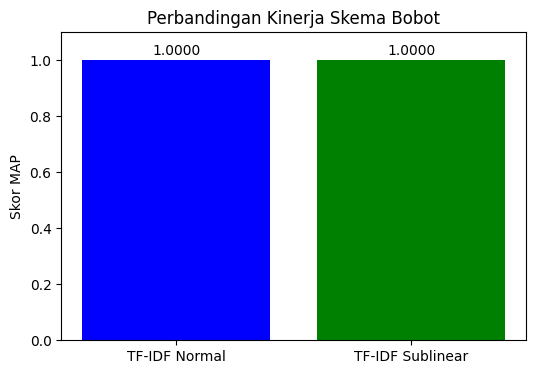

In [ ]:
#Perbandingan MAP

vsm_truth_set = {
    "hewan kera kalimantan": ['orangutan.txt', 'bekantan.txt'],
    "badak bercula satu": ['badak_jawa.txt'],
    "burung endemik dari bali": ['jalak_bali.txt']
}

#TF-IDF Normal
ap_normal = []
for query, gold_docs in vsm_truth_set.items():
    results = flexible_vsm_search(query, tfidf_matrix, top_k=len(documents))
    ap = calculate_average_precision(results, gold_docs)
    ap_normal.append(ap)
map_normal = sum(ap_normal) / len(ap_normal) if ap_normal else 0

#TF-IDF Sublinear
ap_sublinear = []
for query, gold_docs in vsm_truth_set.items():
    results = flexible_vsm_search(query, sublinear_tfidf_matrix, top_k=len(documents))
    ap = calculate_average_precision(results, gold_docs)
    ap_sublinear.append(ap)
map_sublinear = sum(ap_sublinear) / len(ap_sublinear) if ap_sublinear else 0

print("--- Perbandingan Kinerja Skema Pembobotan ---")
print(f"Skor MAP dengan TF-IDF Normal: {map_normal:.4f}")
print(f"Skor MAP dengan TF-IDF Sublinear: {map_sublinear:.4f}")

import matplotlib.pyplot as plt

schemes = ['TF-IDF Normal', 'TF-IDF Sublinear']
map_scores = [map_normal, map_sublinear]

plt.figure(figsize=(6, 4))
plt.bar(schemes, map_scores, color=['blue', 'green'])
plt.ylabel('Skor MAP')
plt.title('Perbandingan Kinerja Skema Bobot')
plt.ylim(0, 1.1)
for i, score in enumerate(map_scores):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center')
plt.show()

In [ ]:
#Fungsi Search Engine Orchestrator

def search_engine(query, model='vsm', k=3):

    print(f"--- Menjalankan Pencarian ---")
    print(f"Query: '{query}'")
    print(f"Model: {model.upper()}")

    if model == 'boolean':
        results = boolean_search(query, inverted_index, documents)
        print(f"\nDitemukan {len(results)} dokumen:")
        for doc_name in results:
            print(f"- {doc_name}")
        return results

    elif model == 'vsm':
        results = flexible_vsm_search(query, tfidf_matrix, top_k=k)
        print(f"\nTop {k} hasil pencarian:")
        for doc_name, score in results:
            if score > 0:
                snippet = documents[doc_name].replace('\n', ' ')[:120]
                print(f"- Skor: {score:.4f} | Dokumen: {doc_name}")
                print(f"  Snippet: {snippet}...")
        return results

    else:
        print("Model tidak valid. Pilih 'boolean' atau 'vsm'.")
        return []

In [ ]:
#Testing Search Engine Orchestrator

# Skenario 1: Pengguna ingin mencari dengan VSM (default)
search_engine(query="hewan asli sulawesi")

print("\n" + "="*50 + "\n")

# Skenario 2: Pengguna ingin mencari dengan Boolean
search_engine(query="jalak AND bali", model='boolean')

print("\n" + "="*50 + "\n")

# Skenario 3: Pengguna ingin 5 hasil teratas dengan VSM
search_engine(query="hewan besar dari sumatra", model='vsm', k=5)

--- Menjalankan Pencarian ---
Query: 'hewan asli sulawesi'
Model: VSM

Top 3 hasil pencarian:
- Skor: 0.1962 | Dokumen: anoa.txt
  Snippet: Anoa (Bubalus sp.) atau kerbau kerdil adalah kerbau endemik yang hidup di daratan Pulau Sulawesi dan Pulau Buton. Banyak...
- Skor: 0.0722 | Dokumen: komodo.txt
  Snippet: Komodo atau lengkapnya biawak komodo (Varanus komodoensis), adalah spesies biawak besar yang terdapat di Pulau Komodo, R...
- Skor: 0.0034 | Dokumen: jalak_bali.txt
  Snippet: Jalak Bali (Leucopsar rothschildi) adalah sejenis burung pengicau berukuran sedang, dengan panjang lebih kurang 25 cm, d...


--- Menjalankan Pencarian ---
Query: 'jalak AND bali'
Model: BOOLEAN

Ditemukan 1 dokumen:
- jalak_bali.txt


--- Menjalankan Pencarian ---
Query: 'hewan besar dari sumatra'
Model: VSM

Top 5 hasil pencarian:
- Skor: 0.1984 | Dokumen: harimau_sumatra.txt
  Snippet: Harimau sumatra adalah populasi Panthera tigris sondaica yang mendiami pulau Sumatra, Indonesia dan satu-satunya anggota

[('harimau_sumatra.txt', np.float64(0.19835652613430832)),
 ('gajah_sumatra.txt', np.float64(0.050495370502585166)),
 ('orangutan.txt', np.float64(0.03983035896795345)),
 ('badak_jawa.txt', np.float64(0.03300697457145786)),
 ('jalak_bali.txt', np.float64(0.011216842718539484))]